In [4]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.utils import load_h5_dict

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../../plotting/matplotlibrc")

In [22]:
d0 = load_h5_dict('../../data/pwave/ann_rates_zm.h5')
d1 = load_h5_dict('../../data/pwave/ann_rates_zm_check.h5')

In [10]:
np.array_equal(d0['m_range'], d1['m_range'])

True

In [9]:
np.array_equal(d0['z_range'], d1['z_range'])

True

In [13]:
np.allclose(d0['ann_rates'], d1['ann_rates'])

False

In [15]:
np.min(d0['ann_rates'] / d1['ann_rates'])

0.8183390335385692

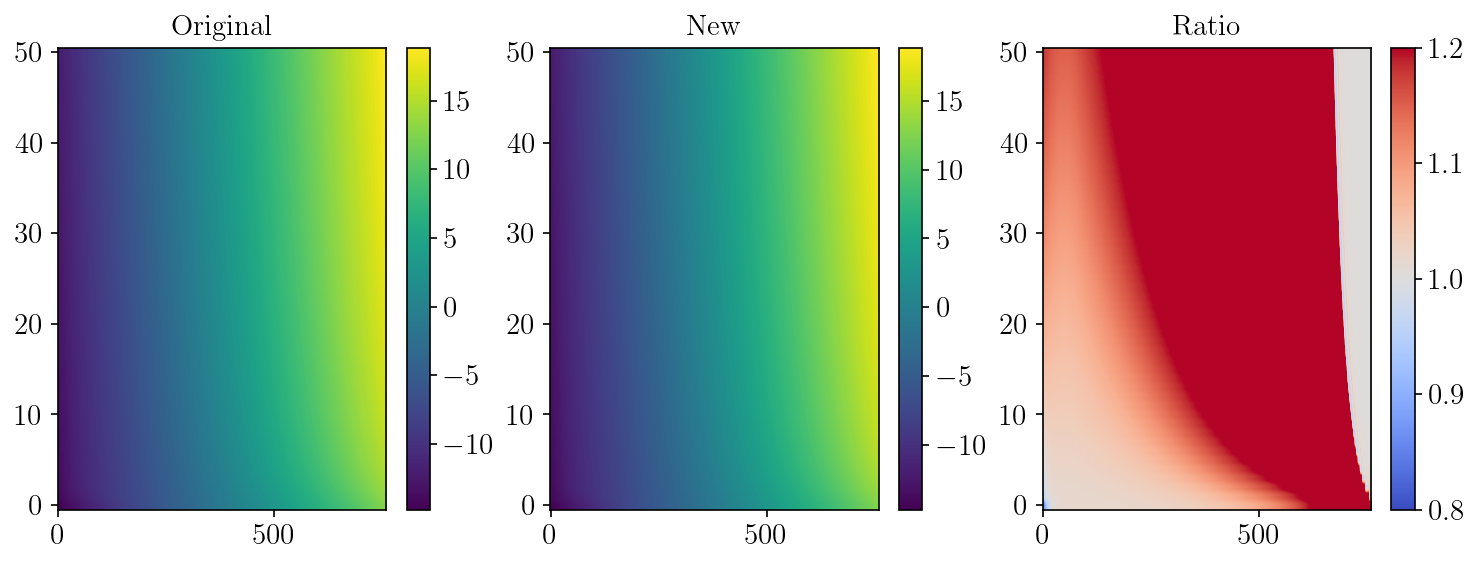

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ax = axs[0]
im = ax.imshow(np.log10(d0['ann_rates']), origin='lower', aspect='auto')
ax.set_title('Original')
fig.colorbar(im, ax=ax)

ax = axs[1]
im = ax.imshow(np.log10(d1['ann_rates']), origin='lower', aspect='auto')
ax.set_title('New')
fig.colorbar(im, ax=ax)

ax = axs[2]
im = ax.imshow(d0['ann_rates'] / d1['ann_rates'], origin='lower', aspect='auto', cmap='coolwarm', vmin=0.8, vmax=1.2)
ax.set_title('Ratio')
fig.colorbar(im, ax=ax)